# Haar Random Unitary (simulator)

In [12]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram

In [13]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [14]:
import sys
sys.path.append("./")

In [15]:
import random
import numpy as np
import importlib
import pickle
import time
from pprint import pprint
import matplotlib.pyplot as plt

In [16]:
from test_unitaries import *

In [17]:
seed = 42 # random seed
num_data = 200 # original: 20000
Nq = 4 # number of qubit
Ns = 1000

In [18]:
results = []

In [19]:
t1 = time.time()
for i in range(1, num_data + 1):
    qc = QuantumCircuit(Nq)
    qc.append(qi.random_unitary(2 ** Nq, seed = i + 5).to_instruction(), range(Nq))
    qc.measure_all()
    results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_simulator = i).result())
    if i % 100 == 0:
        t2 = time.time()
        print("added", i, "th data (", t2 - t1, "s)")
        t1 = t2
        with open("training_data_haar_simulator.pkl", "wb") as f:
            pickle.dump(results, f)

added 100 th data ( 1.0685350894927979 s)
added 200 th data ( 1.2150590419769287 s)


- the result data is stored at .pkl file
- you can convert the data from Result type to counts (dict of state (str) to counts (int)) by the following function

In [20]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

In [21]:
counts = results_to_counts(results)

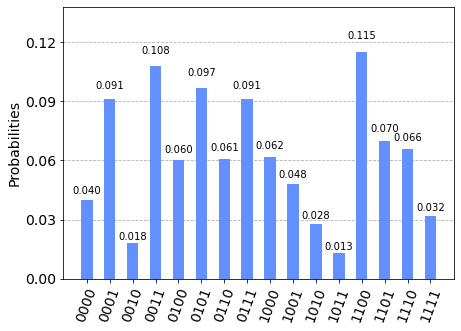

In [22]:
plot_histogram(counts[0])